In [ ]:
%pip install -e ../

Obtaining file:///home/jovyan/exoplanet_lecture_FS2024
  Preparing metadata (setup.py) ... done
  Attempting uninstall: exoplanet-lecture-utils
    Found existing installation: exoplanet-lecture-utils 0.0.1
    Uninstalling exoplanet-lecture-utils-0.0.1:
      Successfully uninstalled exoplanet-lecture-utils-0.0.1
  Running setup.py develop for exoplanet-lecture-utils
Note: you may need to restart the kernel to use updated packages.


# EXTRASOLAR PLANETS - EXERCISE 1.1


First we need to fetch the data from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/) and store them in a nice format (eg. pandas dataframe).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import exoplanet_lecture_utils as elu

#
# TIP: if this doesn't work try restarting the kernel (you can ignore the warning about the celerite package)
#

In [ ]:
# get data
pnasa = elu.get_exoplanet_data()

#
# Pandas TIPS:
#
# pnasa in the above command is a pandas dataframe
#
# list(pnasa.columns.values) will print the column headers
#
# 'pl_orbsmax' is separation from the host star in units AU
# 'pl_bmassj' is planet mass in units of jupiter masses
# 'pl_orbper' is orbital period
# 'pl_rvamp' is Rv semi-amplitude in m/s
# 'pl_orbeccen' is orbital eccentricity
#
# list(pnasa["column_header"].unique()) will print all unique values of a column - try finding all the different discovery methods that have been used to assemble the database
#
# pnasa.loc[pnasa["column_header"]==X] will return planets whose value in the column with header "column_header" is equal to X 
#

#
# Numpy TIPS: 
# when finding quantiles (e.g., the period range covering 90% of RV planets) first remove the NaN's from the data:
# after selecting the Radial Velocity orbital period data from the pandas dataframe, try converting the data to a numpy array and using data = data[~np.isnan(data)]
# then np.quantile(data, 0.9) will return the period at the 90th percentile
#

# EXTRASOLAR PLANETS - EXERCISE 1.2

## 1.2.1 HD 41004 Bb

This is an example for how to use the provided two-body-problem code to simulate the motion of a planet around a star provided in the file `two_body_problem.py`.
We simulate the planet HD 41004 Bb according to `https://exoplanetarchive.ipac.caltech.edu/overview/HD%2041004%20B%20b#planet_HD-41004-B-b_collapsible`.

In [8]:
import sys
from copy import deepcopy

import numpy as np
import exoplanet_lecture_utils as elu
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
system = {
    'mass_star': 880,  # in jupiter masses
    'mass_planet': 18.37,  # in jupiter masses
    'period': 1.33,  # days
    'eccentricity': 0.08,
    'inclination': 90.,  # deg
    'v0': np.array((41.70e3, -8.18e3, 1.75e3))  # km/s
}

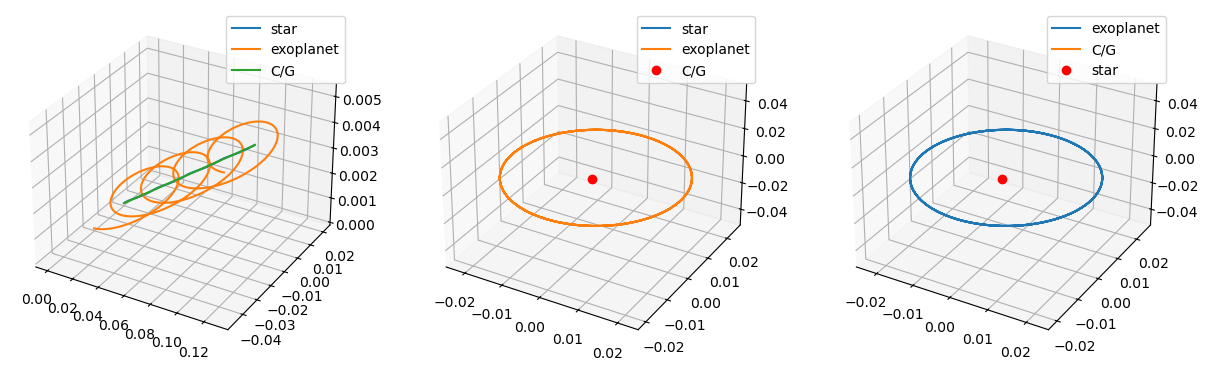

In [10]:
%matplotlib inline
two_body = elu.TwoBodyProblem(m_p=system['mass_planet'],
                              m_s=system['mass_star'],
                              period=system['period'],
                              eccentricity=system['eccentricity'],
                              inclination=system['inclination'],
                              v0=system['v0'])

time, r_s, v_s, r_p, v_p = two_body.get_orbit(t_min=0,
                      t_max=system['period']*4,
                      num_points=10000)

two_body.plot_orbit()

## 1.2.3 51 Pegasi b

Importing the 51 Pegasi b data from the file `51Peg_b.csv`.

In [19]:
peg_b = pd.read_csv('https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/51peg.csv')